# Exploratory Data Analysis for Capstone 3 - Diamond Price Data

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from scipy import stats

### Import Data Files

In [2]:
# File path locations & Read into Dataframe(s)

diamonds_clean = '../Data/diamonds_clean.csv'

diamonds_df = pd.read_csv(diamonds_clean)

### View Data

In [3]:
diamonds_df.sample(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
1950,0.84,Premium,E,SI2,59.2,59.0,6.19,6.14,3.65,3086
32762,0.45,Premium,G,SI2,62.0,62.0,4.96,4.86,3.05,803
18633,1.11,Ideal,G,VS2,62.0,56.0,6.65,6.62,4.12,7608
36069,0.32,Ideal,F,VVS1,61.8,55.0,4.36,4.41,2.71,926
16419,1.13,Premium,G,VS2,60.1,59.0,6.82,6.75,4.08,6561
2791,0.78,Ideal,F,VS2,61.3,57.0,5.91,5.93,3.63,3259
49316,0.79,Good,I,SI1,63.9,55.0,5.85,5.80,3.72,2095
26075,2.08,Premium,I,SI2,61.2,58.0,8.24,8.16,5.02,15321
46634,0.51,Ideal,D,VS2,61.5,57.0,5.11,5.14,3.15,1787
52514,0.72,Premium,F,VS2,60.8,58.0,5.78,5.74,3.50,2530


In [9]:
# Create price per carat column

diamonds_df['pricePerCarat'] = diamonds_df['price'] / diamonds_df['carat']

### Exploratory Visualizations

<AxesSubplot:xlabel='carat', ylabel='price'>

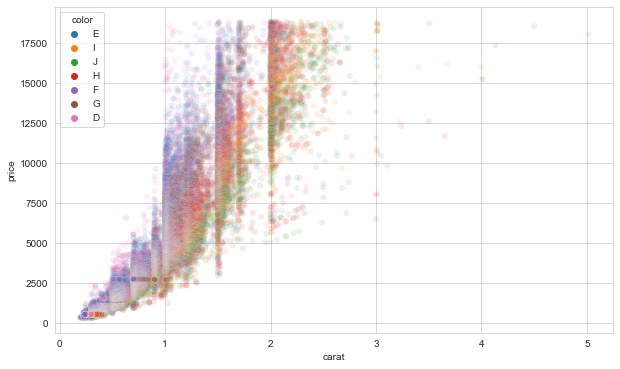

In [18]:
plt.figure(figsize=(10,6))

sns.scatterplot(x='carat', y='price', hue='color', alpha=0.1, data=diamonds_df)

In [10]:
# Correlations

diam_corr = diamonds_df.drop(['carat', 'color','cut', 'clarity'], axis=1)

dcorr = diam_corr.corr(method='spearman')
dcorr

,depth,table,x,y,z,price,pricePerCarat
depth,1.000000,-0.245098,-0.023214,-0.025186,0.103568,0.010013,-0.019897
table,-0.245098,1.000000,0.202294,0.195833,0.160294,0.171797,0.124944
x,-0.023214,0.202294,1.000000,0.997961,0.988378,0.963754,0.854125
y,-0.025186,0.195833,0.997961,1.000000,0.988141,0.963215,0.854488
z,0.103568,0.160294,0.988378,0.988141,1.000000,0.958593,0.845692
price,0.010013,0.171797,0.963754,0.963215,0.958593,1.000000,0.955749
pricePerCarat,-0.019897,0.124944,0.854125,0.854488,0.845692,0.955749,1.000000


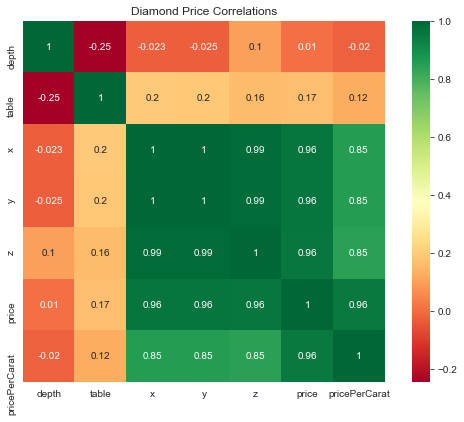

In [16]:
# Visualize these correlations

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(dcorr, cmap='RdYlGn', annot=True, square=True, ax=ax)

ax.set_title('Diamond Price Correlations')

plt.tight_layout()
plt.show()

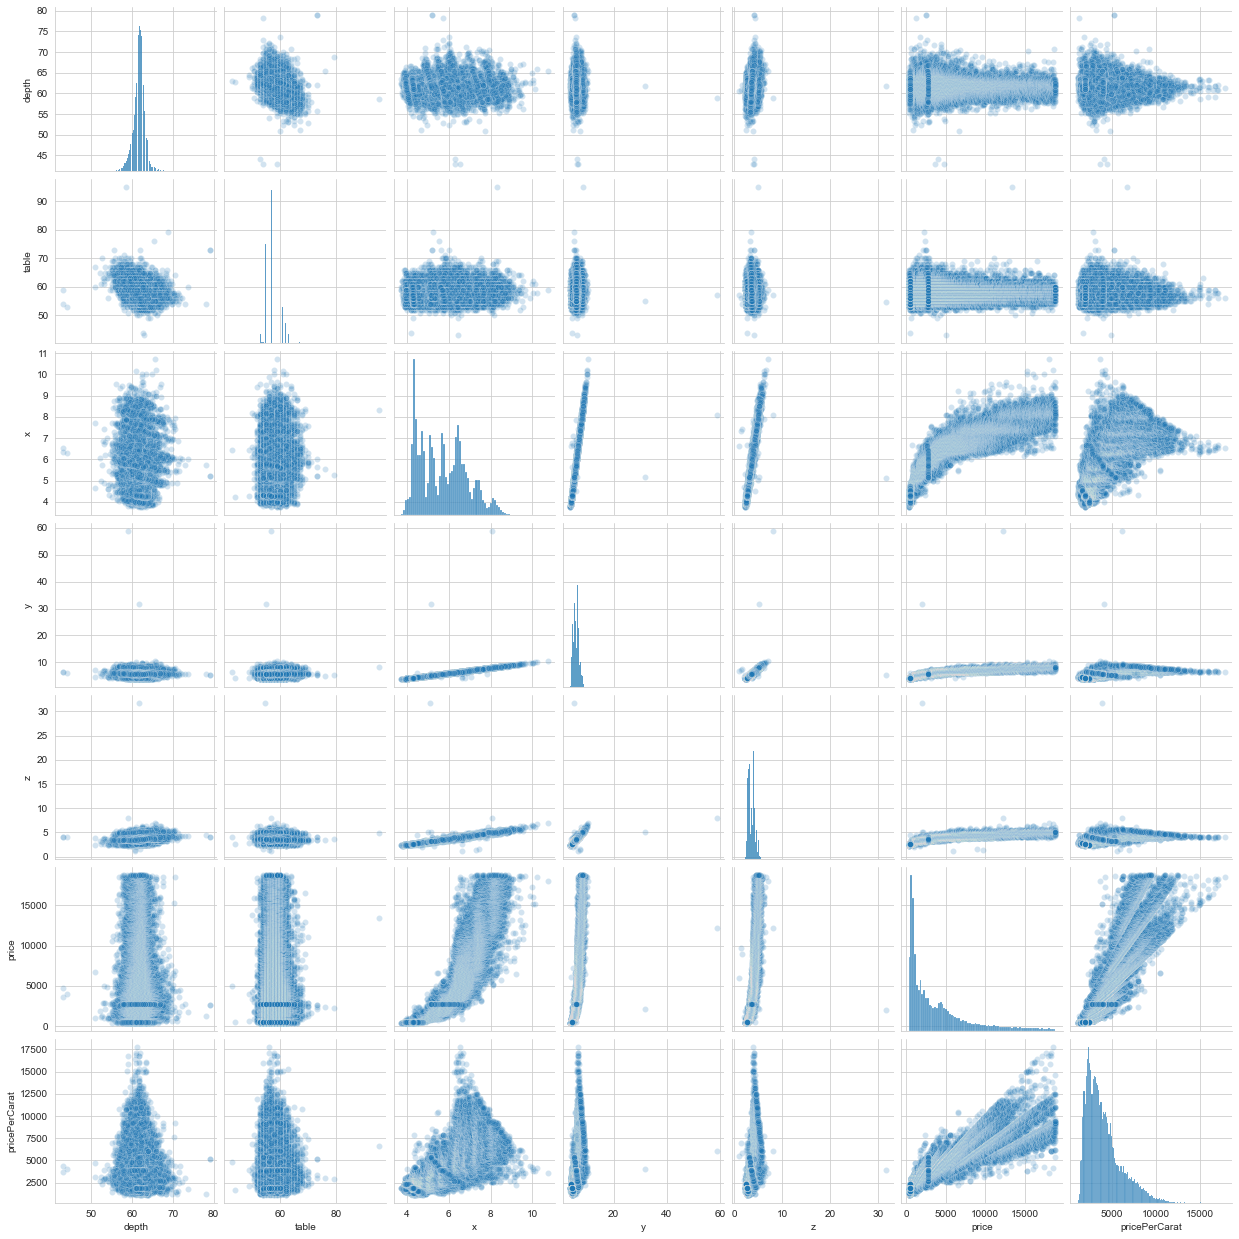

In [20]:
sns.pairplot(diam_corr, kind='scatter', plot_kws={'alpha':0.2})

### Export Files to CSV

In [ ]:
# Export Clean Files

#diamonds_df.to_csv('../Data/diamonds_4preproc.csv', index=False)